# Data Overview and Distribution Analysis
- the eda part

In [2]:
import kagglehub
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("sanjeetsinghnaik/la-liga-match-data")

print("Path to dataset files:", path)
data = pd.read_csv(path + "/combined_data_laliga.csv")
data.head()

Path to dataset files: C:\Users\dasha\.cache\kagglehub\datasets\sanjeetsinghnaik\la-liga-match-data\versions\1


,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,0,MÁLAGA,ATHLETIC,1-0,1-0,4.4,6.0,5.7,40,60,...,14.0,9.0,3.0,0.0,0.0,1,0,0,1,2014
1,1,SEVILLA FC,VALENCIA,1-1,1-0,4.7,6.5,6.8,47,53,...,16.0,8.0,2.0,0.0,1.0,1,1,1,1,2014
2,2,GRANADA,DEPORTIVO,2-1,0-1,4.6,7.2,5.9,53,47,...,14.0,26.0,3.0,0.0,0.0,2,1,1,2,2014
3,3,ALMERÍA,ESPANYOL,1-1,0-0,5.6,6.9,5.5,56,44,...,20.0,9.0,3.0,1.0,0.0,1,1,1,1,2014
4,4,EIBAR,REAL SOCIEDAD,1-0,1-0,3.7,6.5,5.9,41,59,...,20.0,14.0,1.0,0.0,0.0,1,0,0,1,2014


<Axes: title={'center': 'Number of matches played each year'}, xlabel='year'>

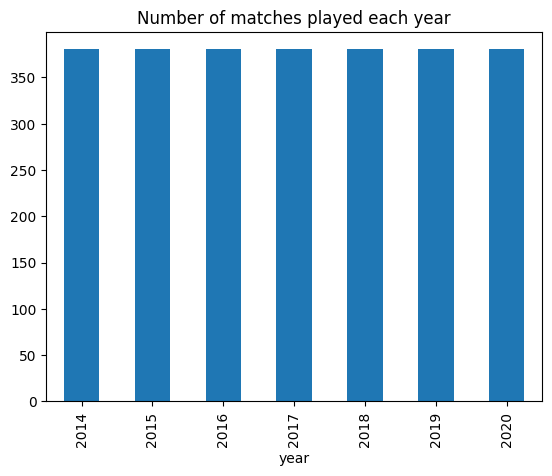

In [4]:
data.groupby('year')['year'].count().plot(kind='bar', title='Number of matches played each year')

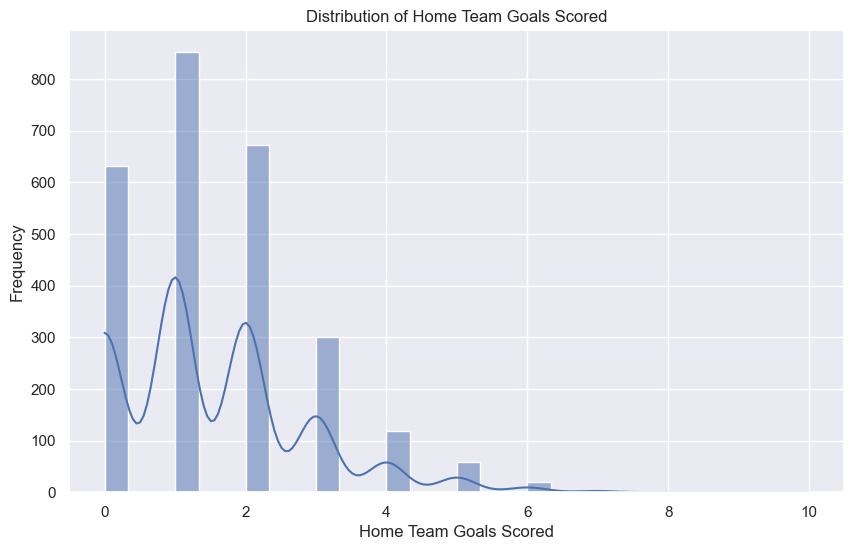

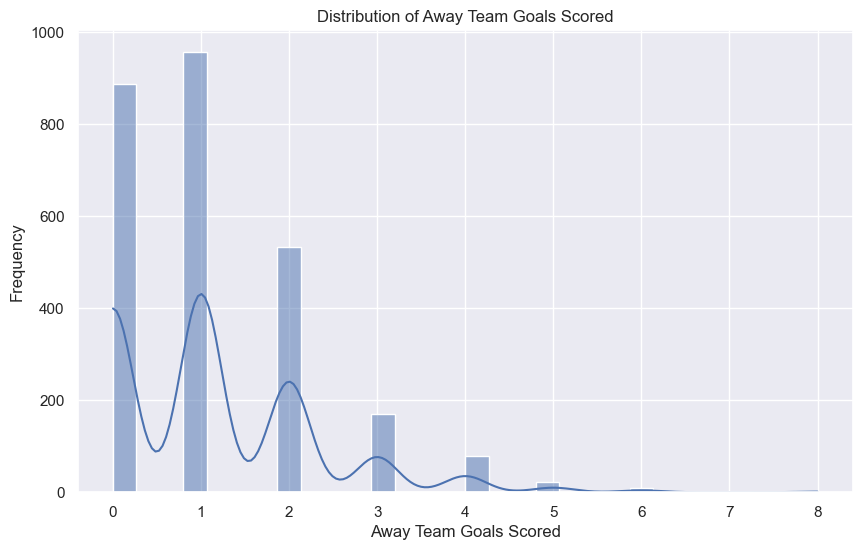

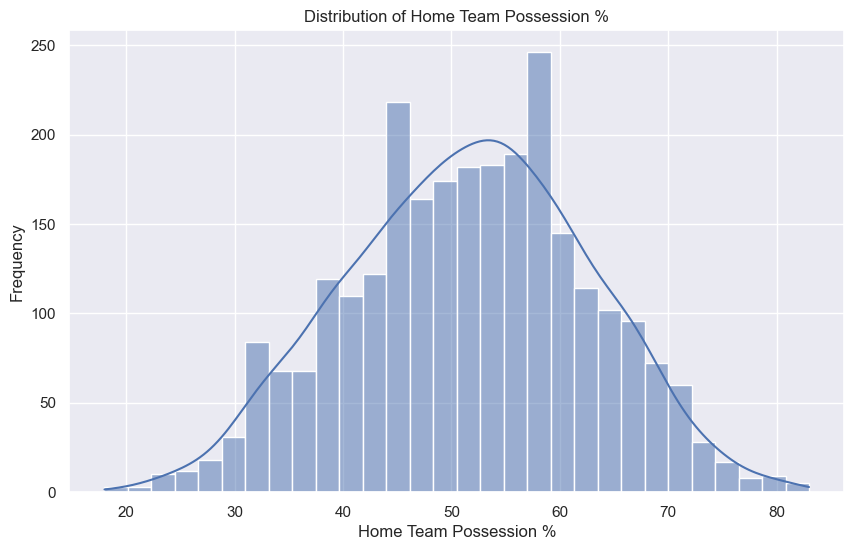

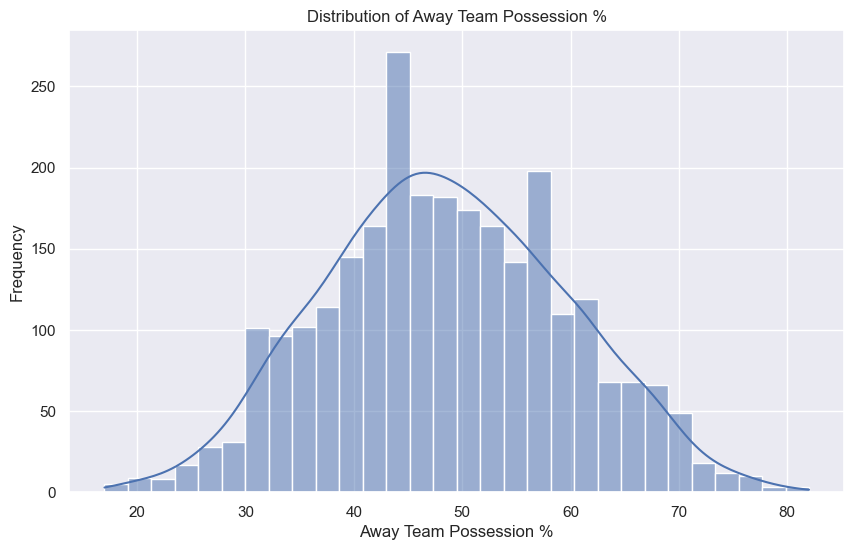

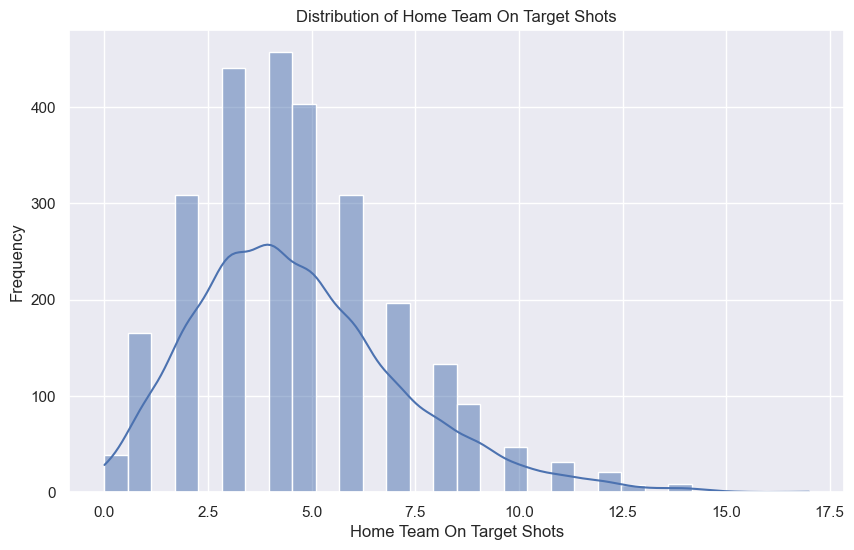

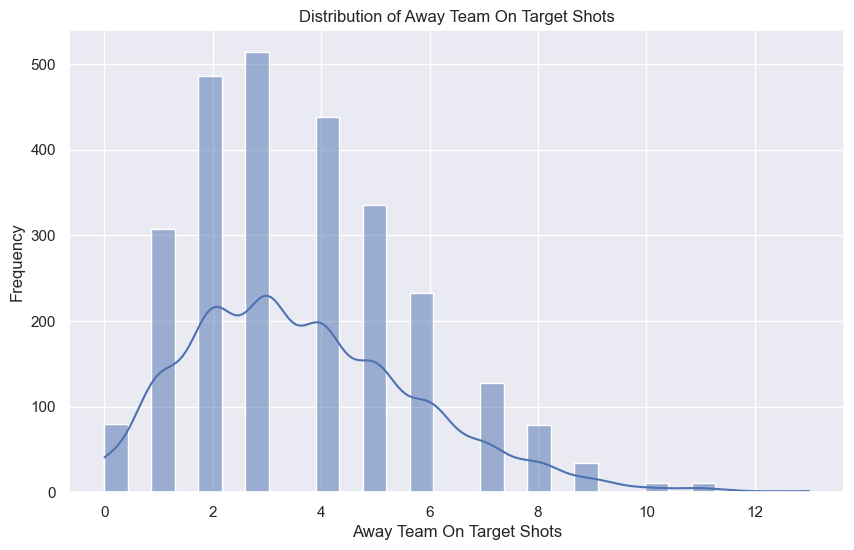

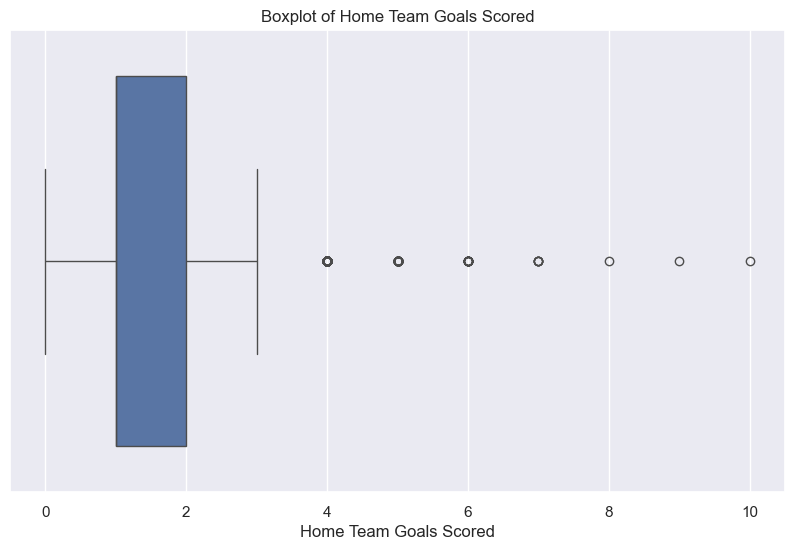

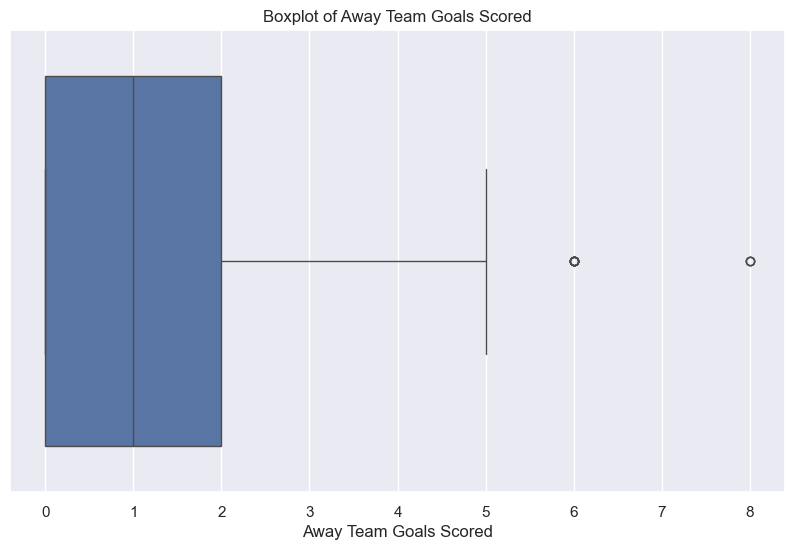

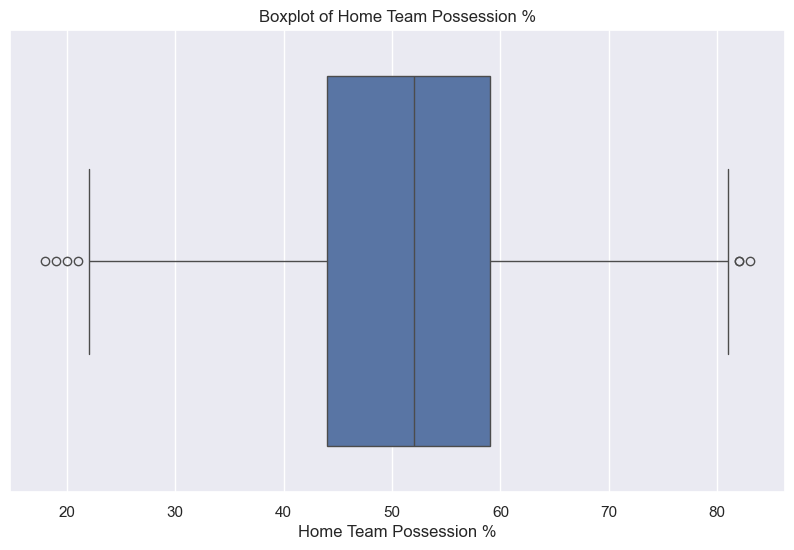

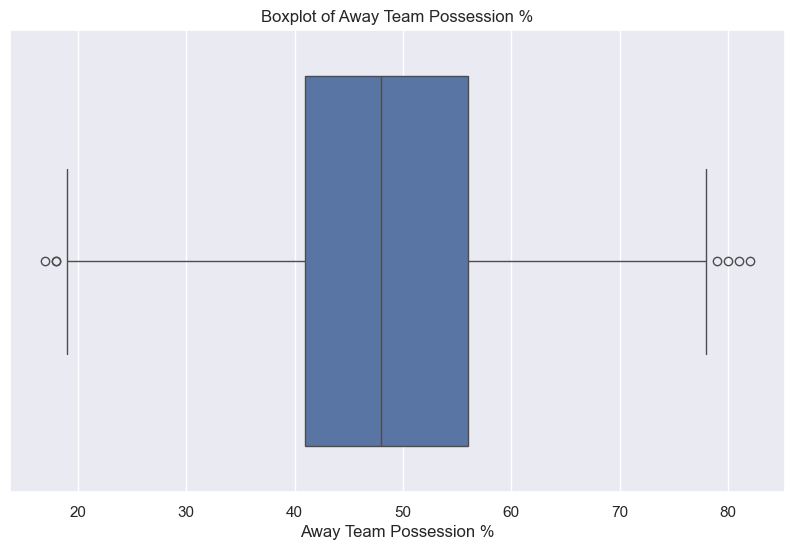

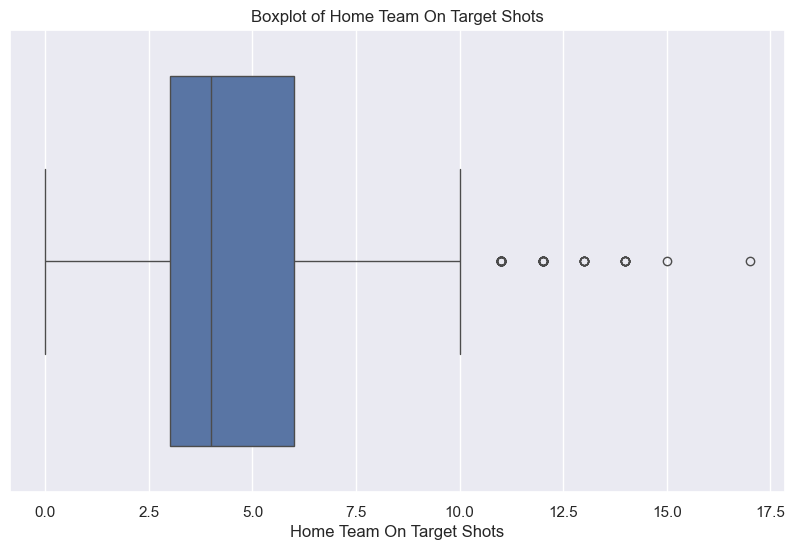

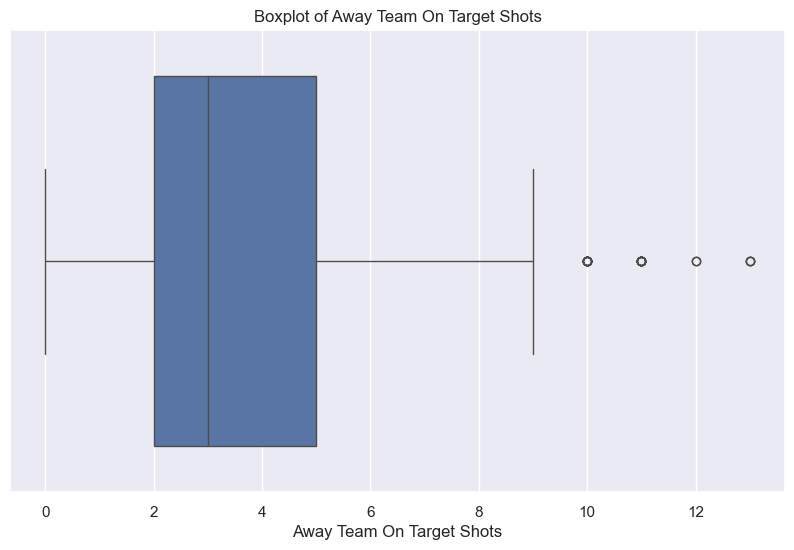

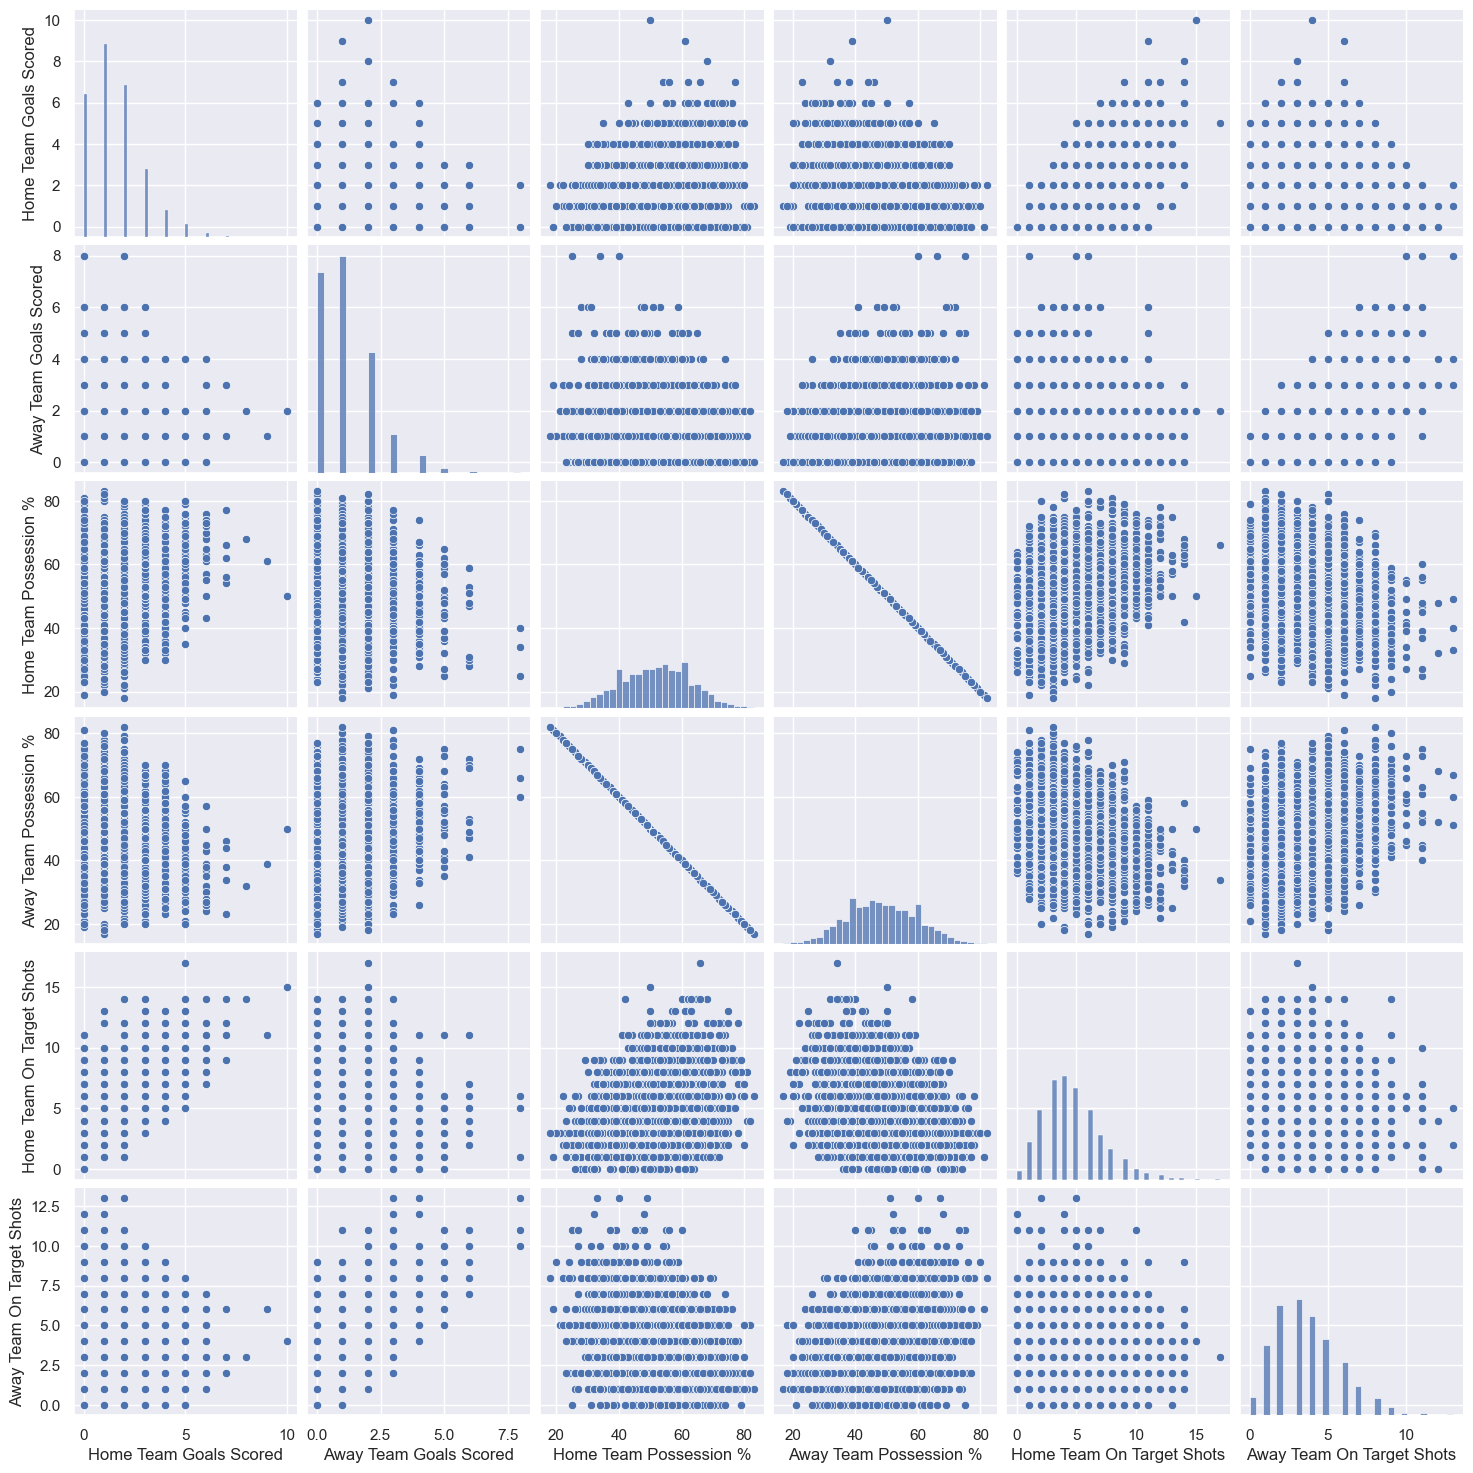

In [12]:
# Data Overview and Distribution Analysis

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

columns_to_analyze = [
    'Home Team Goals Scored', 'Away Team Goals Scored', 
    'Home Team Possession %', 'Away Team Possession %', 
    'Home Team On Target Shots', 'Away Team On Target Shots'
]

for column in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

for column in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

sns.pairplot(data[columns_to_analyze])
plt.show()

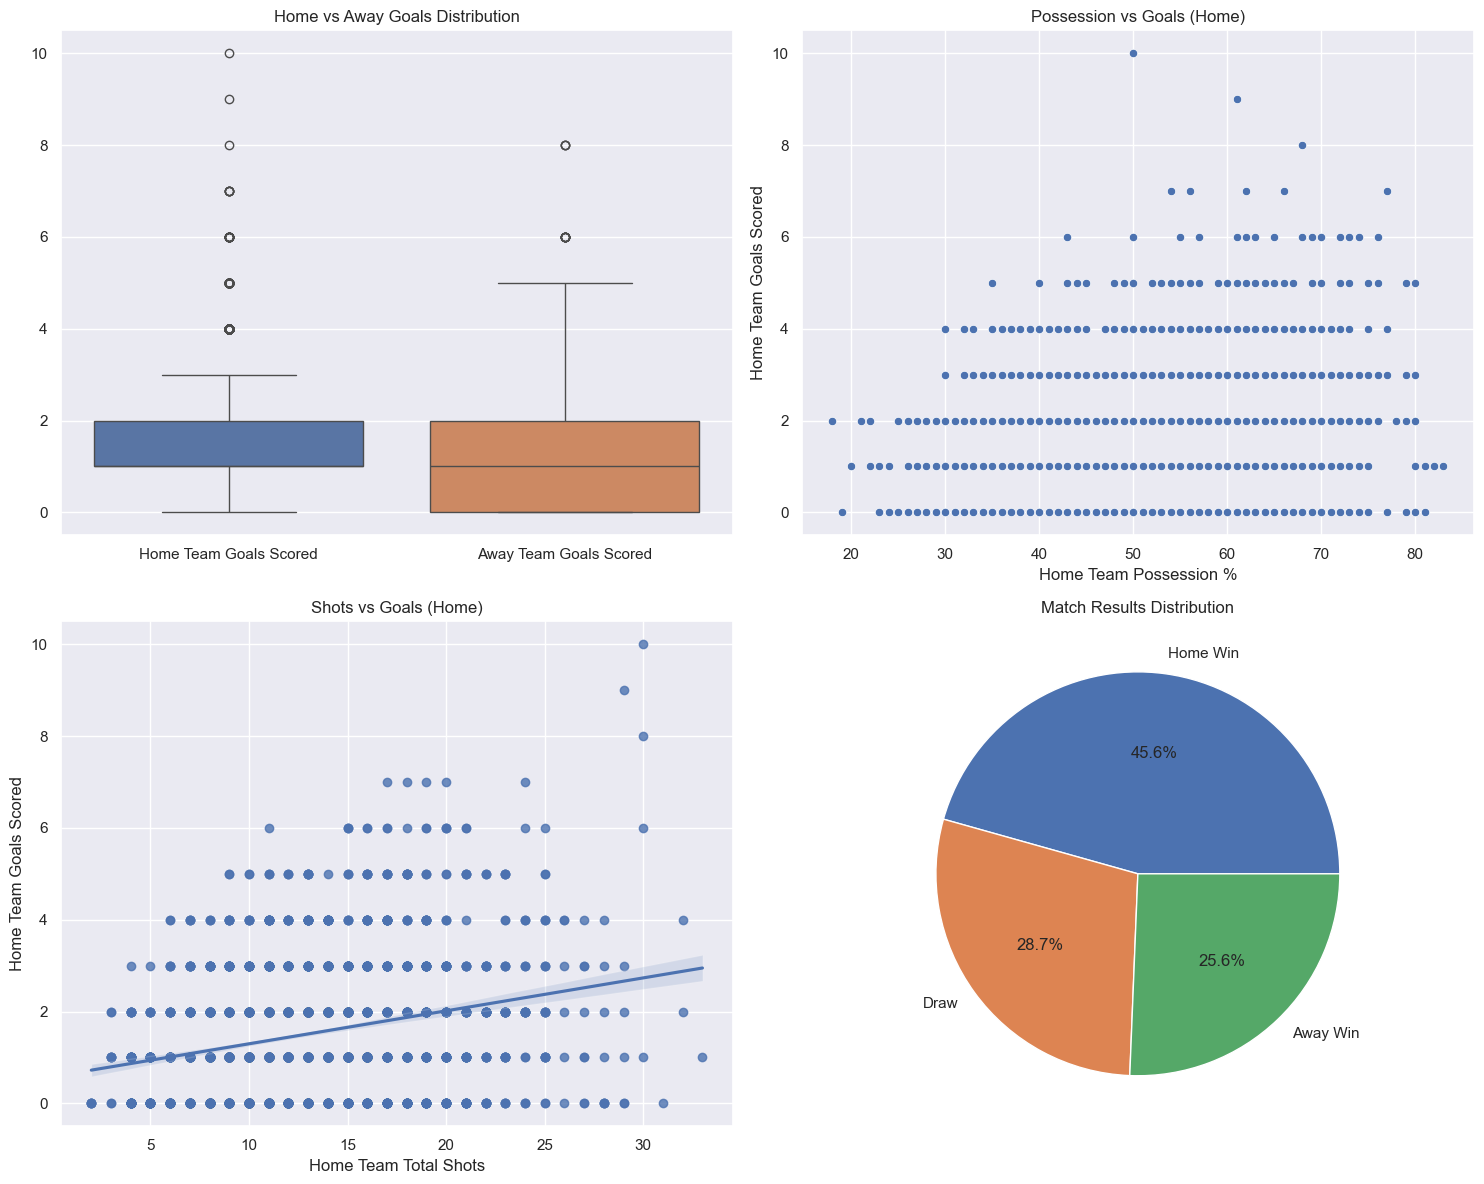

Average Home Goals: 1.52
Average Away Goals: 1.14
Home Win Rate: 45.6%
Shot Conversion Rate (Home): 12.3%


In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(data=data[['Home Team Goals Scored', 'Away Team Goals Scored']], ax=axes[0,0])
axes[0,0].set_title('Home vs Away Goals Distribution')

sns.scatterplot(data=data, x='Home Team Possession %', 
                y='Home Team Goals Scored', ax=axes[0,1])
axes[0,1].set_title('Possession vs Goals (Home)')

sns.regplot(data=data, x='Home Team Total Shots', 
            y='Home Team Goals Scored', ax=axes[1,0])
axes[1,0].set_title('Shots vs Goals (Home)')

result_counts = data['result'].value_counts()
axes[1,1].pie(result_counts, labels=['Home Win', 'Draw', 'Away Win'], 
              autopct='%1.1f%%')
axes[1,1].set_title('Match Results Distribution')

plt.tight_layout()
plt.show()

print(f"Average Home Goals: {data['Home Team Goals Scored'].mean():.2f}")
print(f"Average Away Goals: {data['Away Team Goals Scored'].mean():.2f}")
print(f"Home Win Rate: {(data['result']==1).mean()*100:.1f}%")
print(f"Shot Conversion Rate (Home): {(data['Home Team Goals Scored']/data['Home Team Total Shots']).mean()*100:.1f}%")

1. **Scoring Patterns**
- Goals distribution is slightly right-skewed, with most matches having 1-2 goals 
- More goals tend to be scored in the second half compared to first half
- Home teams have a scoring advantage, averaging more goals than away teams
- Results show home advantage with ~45% home wins vs ~30% away wins


# Team Performance Analysis


In [4]:
data['Home Team Half Time Goals'] = data['Half Time Score'].apply(lambda x: x.split('-')[0]).astype(int)
data['Away Team Half Time Goals'] = data['Half Time Score'].apply(lambda x: x.split('-')[1]).astype(int)
def get_match_result(home_goals, away_goals):
    """
    0 -> draw; 1 -> home team won; 2 -> away team won
    """
    if home_goals == away_goals:
        return 0
    elif home_goals > away_goals:
        return 1
    else:
        return 2

data['result'] = data.apply(
    lambda row: get_match_result(
        row['Home Team Goals Scored'], 
        row['Away Team Goals Scored']
    ), 
    axis=1
)

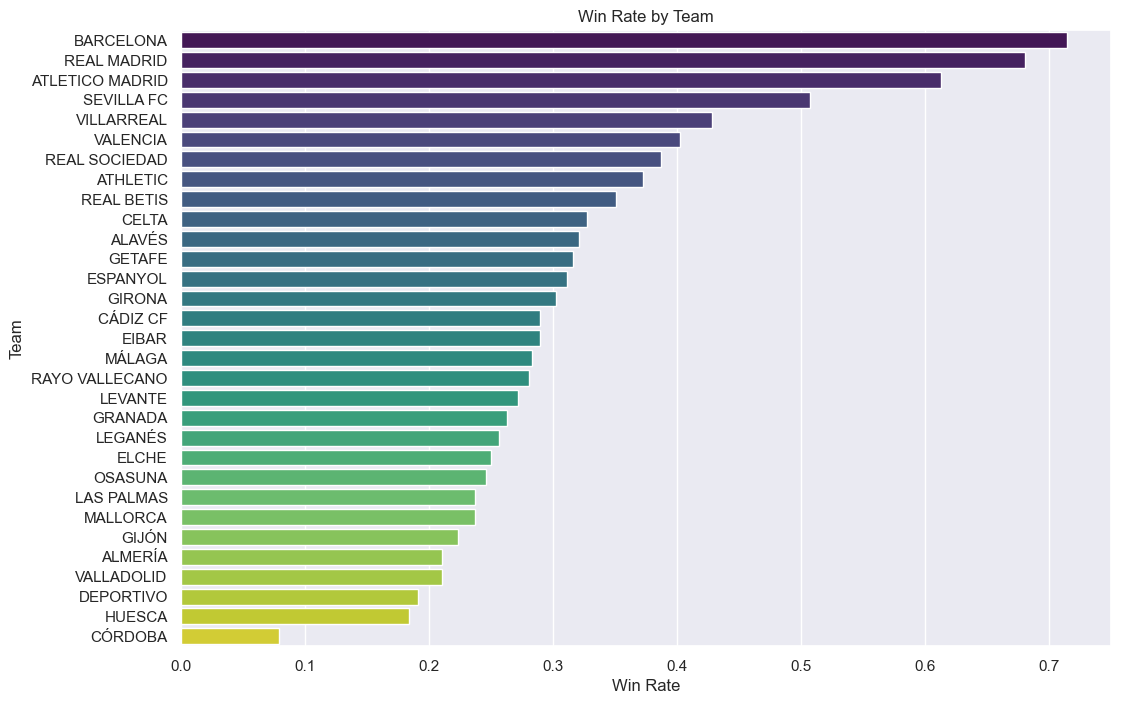

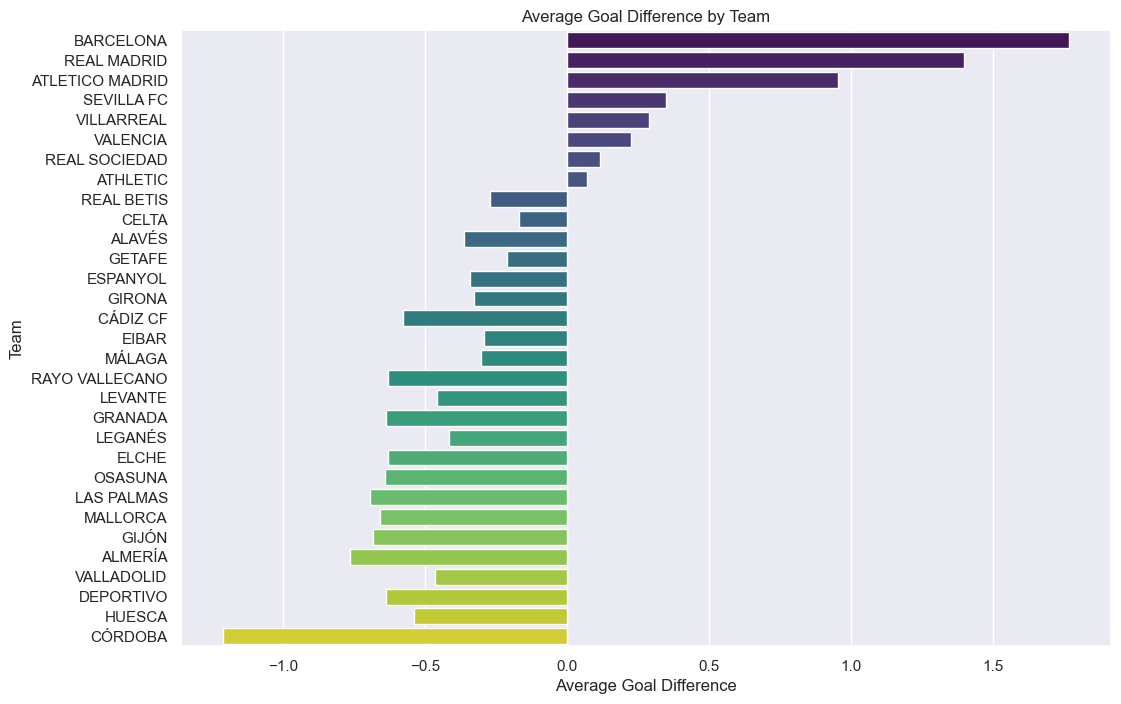

,Team,Win Rate,Average Goal Difference,Overall Rank
4,BARCELONA,0.714286,1.766917,1.00
25,REAL MADRID,0.680451,1.398496,2.00
3,ATLETICO MADRID,0.612782,0.954887,3.00
27,SEVILLA FC,0.507519,0.349624,4.00
30,VILLARREAL,0.428571,0.289474,5.00
28,VALENCIA,0.402256,0.225564,6.00
26,REAL SOCIEDAD,0.387218,0.116541,7.00
2,ATHLETIC,0.372180,0.071429,8.00
5,CELTA,0.327068,-0.169173,9.50
24,REAL BETIS,0.350877,-0.271930,10.00


In [29]:
import warnings
warnings.filterwarnings('ignore')

home_wins = data.groupby('Home Team')['result'].apply(lambda x: (x == 1).sum()).reset_index()
away_wins = data.groupby('Away Team')['result'].apply(lambda x: (x == 2).sum()).reset_index()
home_games = data.groupby('Home Team').size().reset_index(name='home_games')
away_games = data.groupby('Away Team').size().reset_index(name='away_games')
win_rate = pd.merge(home_wins, away_wins, left_on='Home Team', right_on='Away Team')
win_rate = pd.merge(win_rate, home_games, left_on='Home Team', right_on='Home Team')
win_rate = pd.merge(win_rate, away_games, left_on='Away Team', right_on='Away Team')

win_rate['Win Rate'] = (win_rate['result_x'] + win_rate['result_y']) / (win_rate['home_games'] + win_rate['away_games'])
win_rate = win_rate[['Home Team', 'Win Rate']]
win_rate.columns = ['Team', 'Win Rate']
home_gd = data.groupby('Home Team').apply(
	lambda x: (x['Home Team Goals Scored'] - x['Away Team Goals Scored']).mean()
).reset_index()
away_gd = data.groupby('Away Team').apply(
	lambda x: (x['Away Team Goals Scored'] - x['Home Team Goals Scored']).mean()
).reset_index()

avg_goal_diff = pd.merge(home_gd, away_gd, left_on='Home Team', right_on='Away Team')
avg_goal_diff['Average Goal Difference'] = (avg_goal_diff['0_x'] + avg_goal_diff['0_y']) / 2
avg_goal_diff = avg_goal_diff[['Home Team', 'Average Goal Difference']]
avg_goal_diff.columns = ['Team', 'Average Goal Difference']

team_performance = pd.merge(win_rate, avg_goal_diff, on='Team')

team_performance = team_performance.sort_values(by='Win Rate', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Win Rate', y='Team', data=team_performance, palette='viridis')
plt.title('Win Rate by Team')
plt.xlabel('Win Rate')
plt.ylabel('Team')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Average Goal Difference', y='Team', data=team_performance, palette='viridis')
plt.title('Average Goal Difference by Team')
plt.xlabel('Average Goal Difference')
plt.ylabel('Team')
plt.show()

team_performance['Win Rate Rank'] = team_performance['Win Rate'].rank(ascending=False)
team_performance['Goal Difference Rank'] = team_performance['Average Goal Difference'].rank(ascending=False)

team_performance['Overall Rank'] = team_performance[['Win Rate Rank', 'Goal Difference Rank']].mean(axis=1)

team_performance = team_performance.sort_values(by='Overall Rank')

team_performance[['Team', 'Win Rate', 'Average Goal Difference', 'Overall Rank']]


2. **Team Performance**
- Strong home field advantage across most teams
- Top teams show consistent performance both home and away
- Goal difference correlates strongly with team success/ranking
- Win rates vary significantly between home/away matches

# Match Statistics Correlations

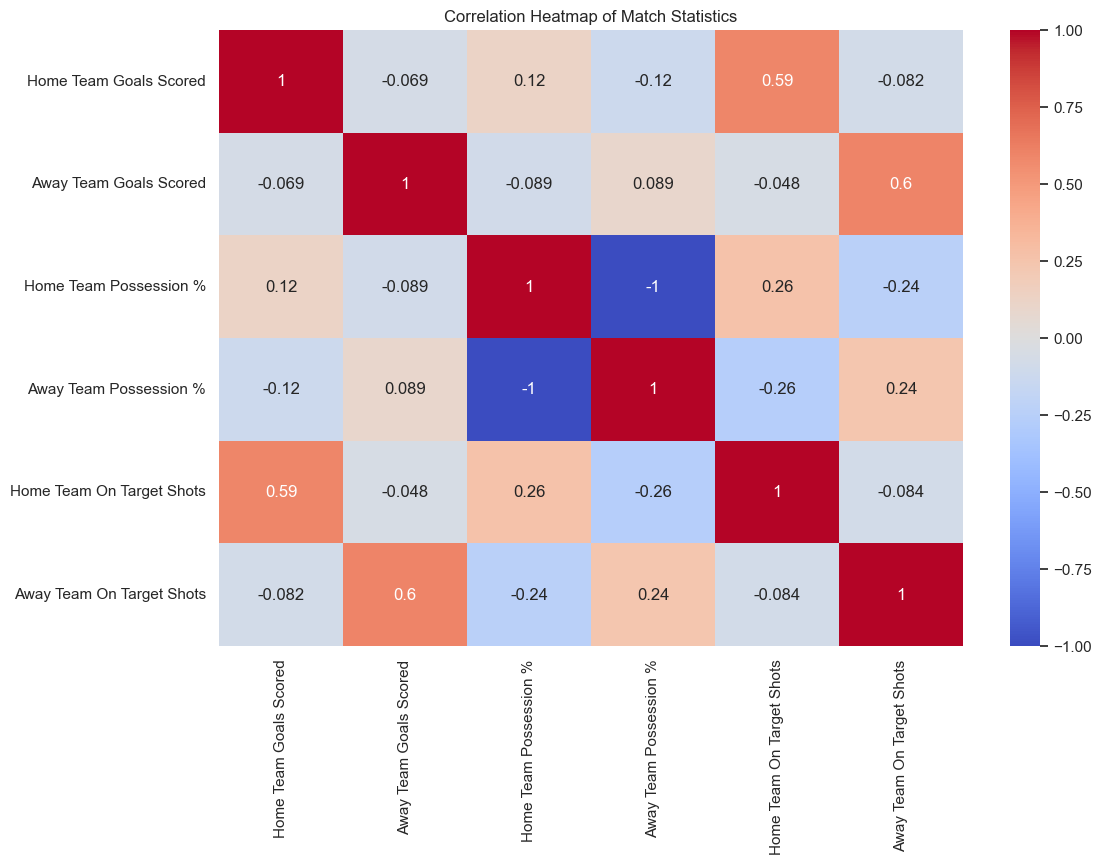

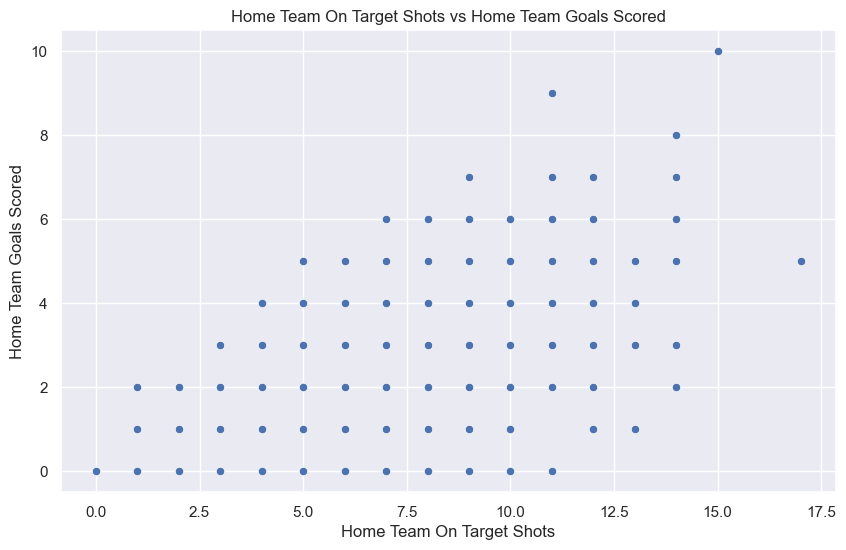

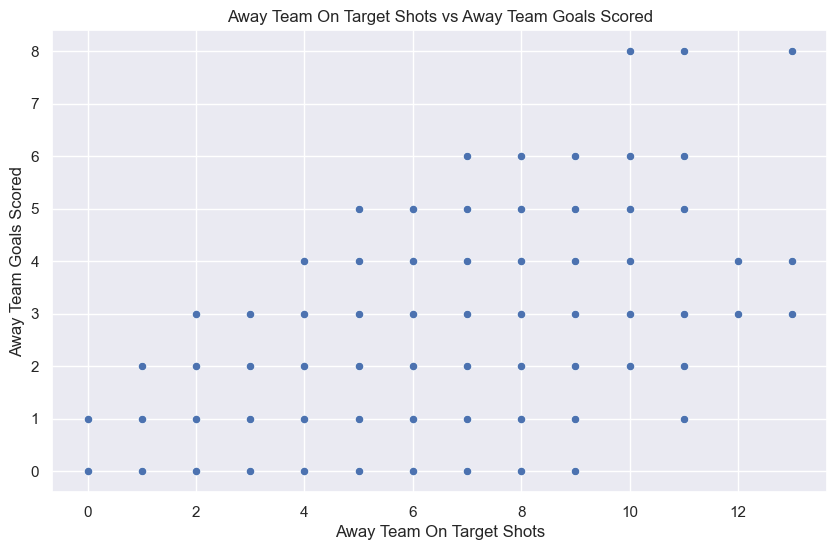

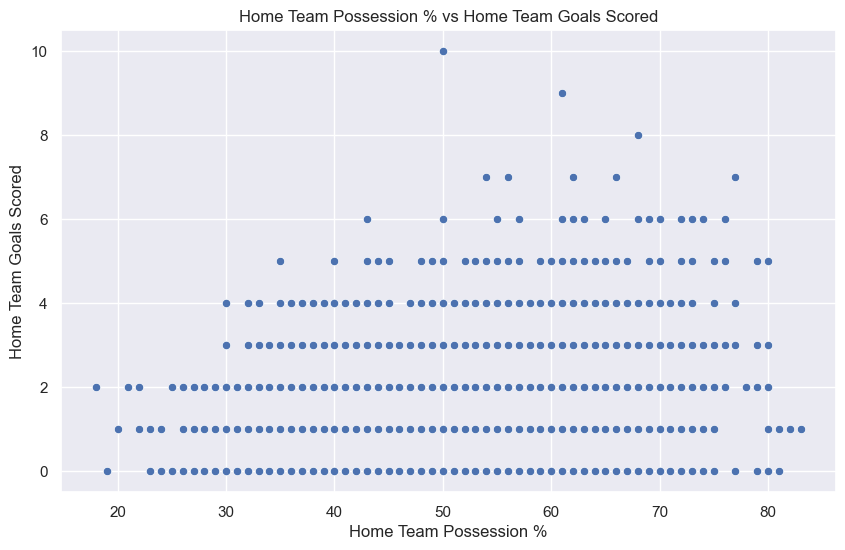

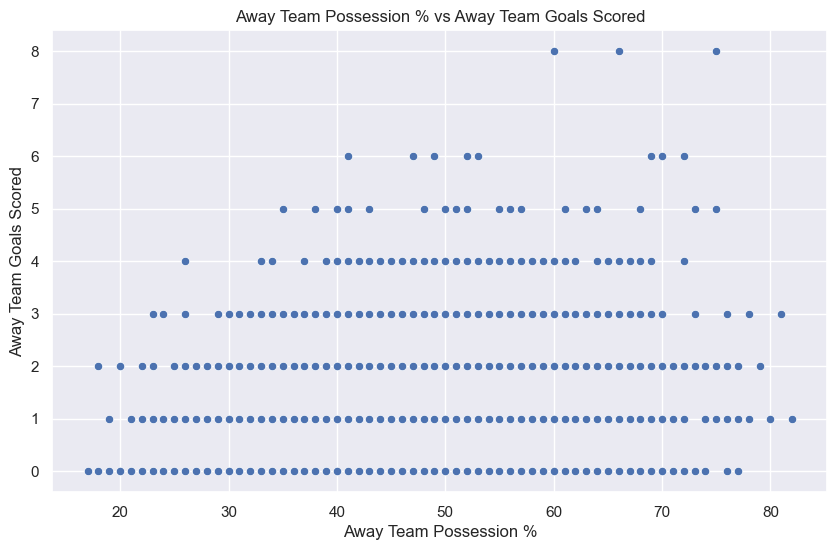

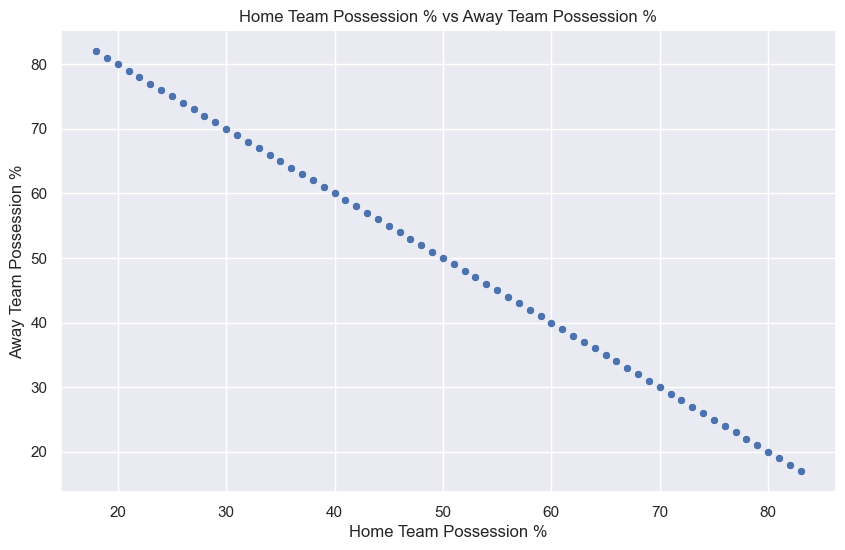

In [ ]:
correlation_matrix = data[columns_to_analyze].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Match Statistics')
plt.show()

scatter_columns = [
    ('Home Team On Target Shots', 'Home Team Goals Scored'),
    ('Away Team On Target Shots', 'Away Team Goals Scored'),
    ('Home Team Possession %', 'Home Team Goals Scored'),
    ('Away Team Possession %', 'Away Team Goals Scored'),
    ('Home Team Possession %', 'Away Team Possession %')
]

for x_col, y_col in scatter_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[x_col], y=data[y_col])
    plt.title(f'{x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

3. **Match Statistics Correlations**
- Strong positive correlation between shots on target and goals scored ( .5 - .6)
- Moderate correlation between possession and goals scored
- Home team possession tends to be higher than away team
- Goal scoring efficiency varies between teams

# Home vs Away Performance Analysis

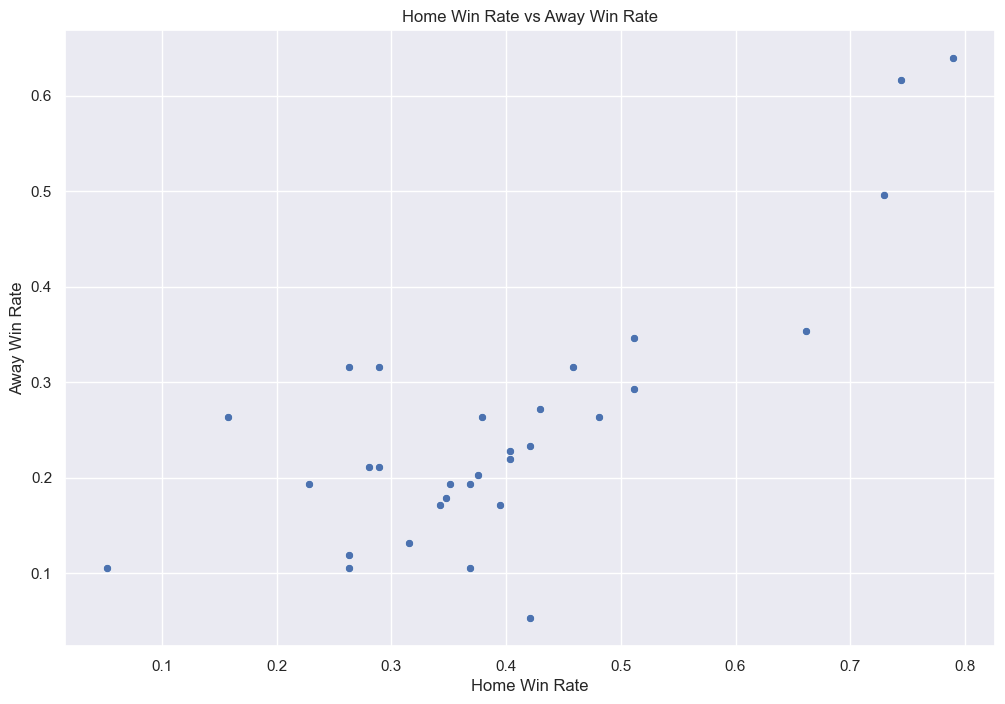

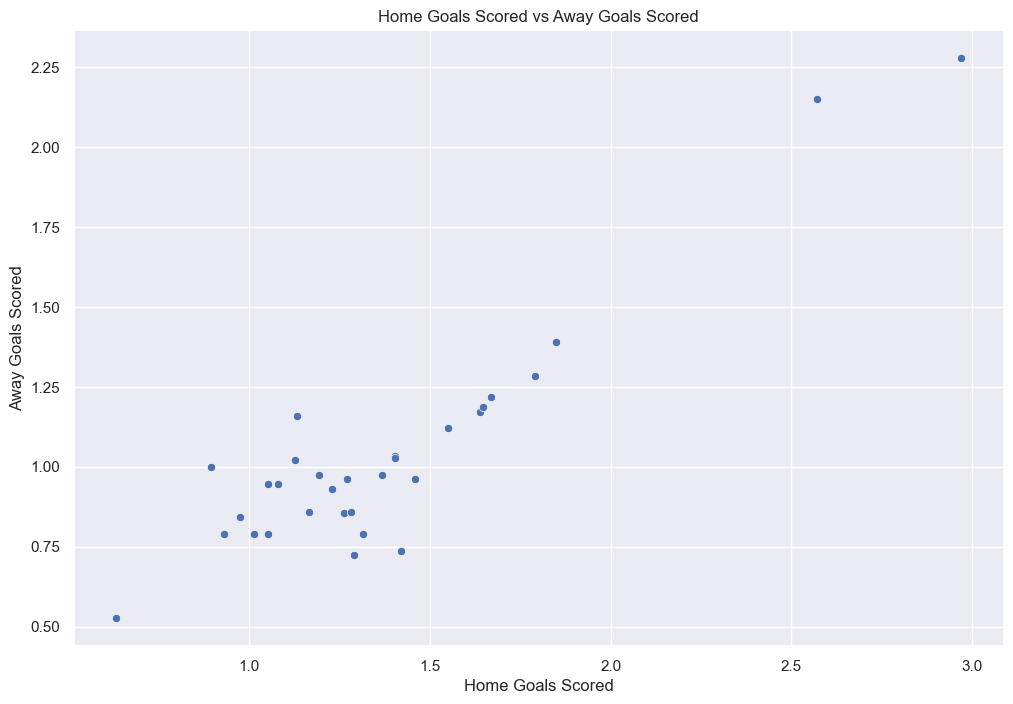

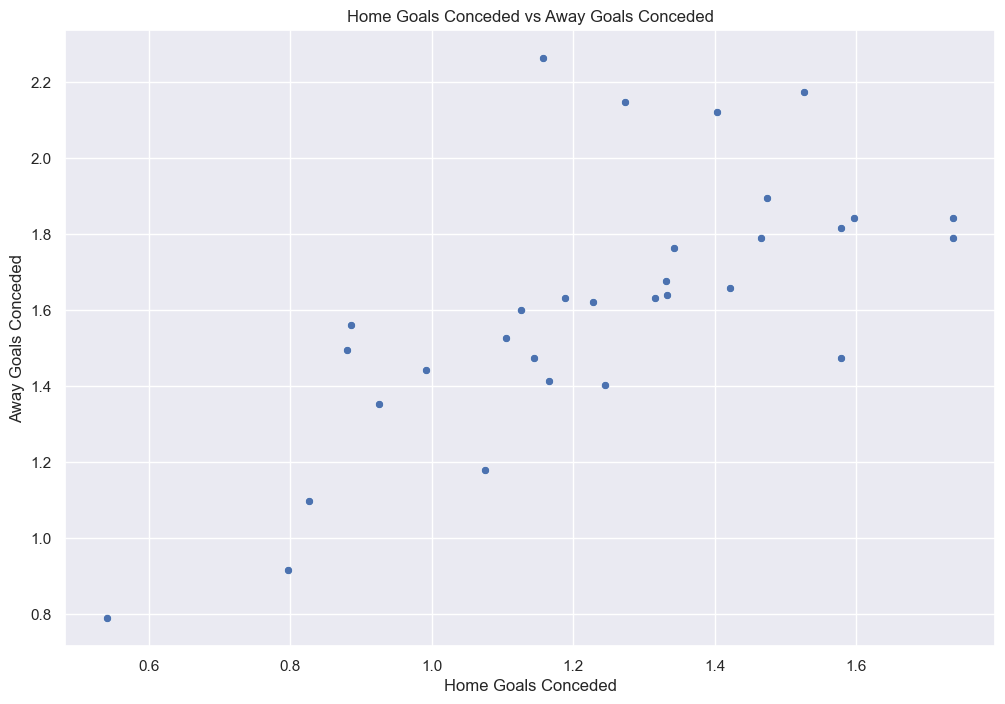

C:\Users\dasha\AppData\Local\Temp\ipykernel_3476\1563623268.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Home Field Advantage', y='Team', data=performance_comparison.sort_values(by='Home Field Advantage', ascending=False), palette='viridis')


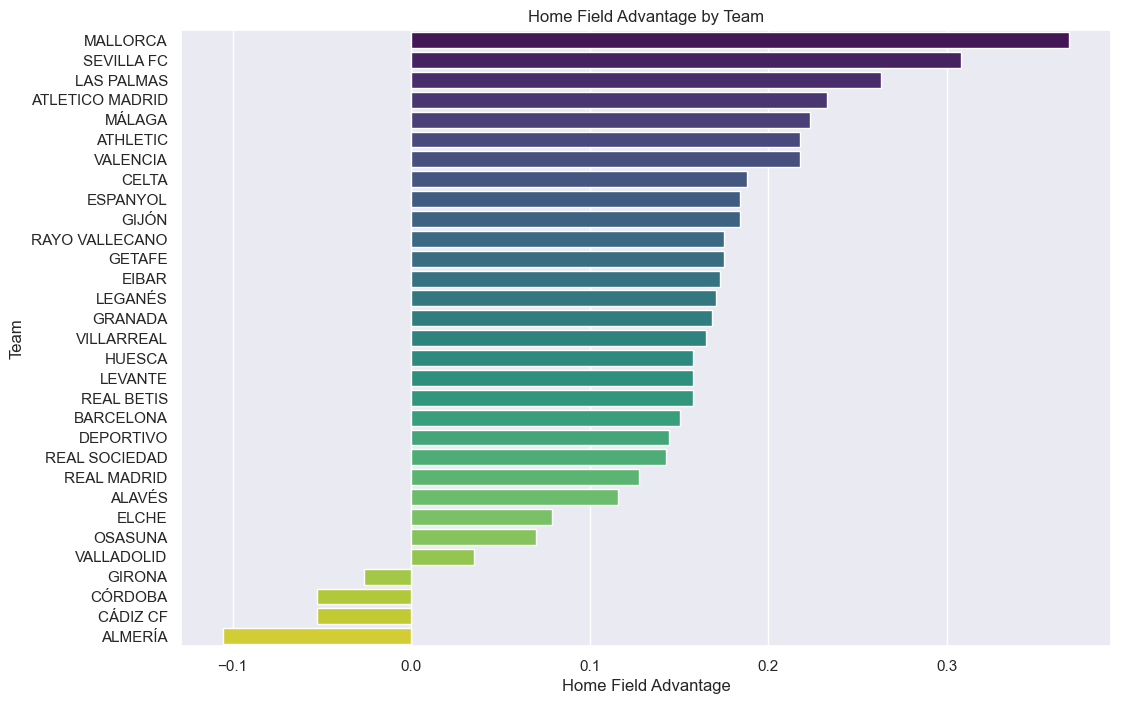

,Team,Home Win Rate,Away Win Rate,Home Goals Scored,Away Goals Scored,Home Goals Conceded,Away Goals Conceded,Home Field Advantage
0,ALAVÉS,0.378947,0.263158,1.052632,0.947368,1.126316,1.600000,0.115789
1,ALMERÍA,0.157895,0.263158,1.052632,0.789474,1.473684,1.894737,-0.105263
2,ATHLETIC,0.481203,0.263158,1.458647,0.962406,0.924812,1.353383,0.218045
3,ATLETICO MADRID,0.729323,0.496241,1.849624,1.390977,0.541353,0.789474,0.233083
4,BARCELONA,0.789474,0.639098,2.969925,2.278195,0.796992,0.917293,0.150376
5,CELTA,0.421053,0.233083,1.548872,1.120301,1.330827,1.676692,0.187970
6,CÁDIZ CF,0.263158,0.315789,0.894737,1.000000,1.578947,1.473684,-0.052632
7,CÓRDOBA,0.052632,0.105263,0.631579,0.526316,1.736842,1.842105,-0.052632
8,DEPORTIVO,0.263158,0.118421,1.263158,0.855263,1.578947,1.815789,0.144737
9,EIBAR,0.375940,0.203008,1.270677,0.962406,1.187970,1.631579,0.172932


In [23]:

home_win_rate = data.groupby('Home Team')['result'].apply(lambda x: (x == 1).sum() / len(x)).reset_index()
home_win_rate.columns = ['Team', 'Home Win Rate']

away_win_rate = data.groupby('Away Team')['result'].apply(lambda x: (x == 2).sum() / len(x)).reset_index()
away_win_rate.columns = ['Team', 'Away Win Rate']

win_rate_comparison = pd.merge(home_win_rate, away_win_rate, on='Team')

home_goals = data.groupby('Home Team')[['Home Team Goals Scored', 'Home Team Goals Conceeded']].mean().reset_index()
home_goals.columns = ['Team', 'Home Goals Scored', 'Home Goals Conceded']

away_goals = data.groupby('Away Team')[['Away Team Goals Scored', 'Away Team Goals Conceeded']].mean().reset_index()
away_goals.columns = ['Team', 'Away Goals Scored', 'Away Goals Conceded']

goal_comparison = pd.merge(home_goals, away_goals, on='Team')

performance_comparison = pd.merge(win_rate_comparison, goal_comparison, on='Team')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Home Win Rate', y='Away Win Rate', data=performance_comparison)
plt.title('Home Win Rate vs Away Win Rate')
plt.xlabel('Home Win Rate')
plt.ylabel('Away Win Rate')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Home Goals Scored', y='Away Goals Scored', data=performance_comparison)
plt.title('Home Goals Scored vs Away Goals Scored')
plt.xlabel('Home Goals Scored')
plt.ylabel('Away Goals Scored')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Home Goals Conceded', y='Away Goals Conceded', data=performance_comparison)
plt.title('Home Goals Conceded vs Away Goals Conceded')
plt.xlabel('Home Goals Conceded')
plt.ylabel('Away Goals Conceded')
plt.show()

performance_comparison['Home Field Advantage'] = performance_comparison['Home Win Rate'] - performance_comparison['Away Win Rate']

plt.figure(figsize=(12, 8))
sns.barplot(x='Home Field Advantage', y='Team', data=performance_comparison.sort_values(by='Home Field Advantage', ascending=False), palette='viridis')
plt.title('Home Field Advantage by Team')
plt.xlabel('Home Field Advantage')
plt.ylabel('Team')
plt.show()

performance_comparison[['Team', 'Home Win Rate', 'Away Win Rate', 'Home Goals Scored', 'Away Goals Scored', 'Home Goals Conceded', 'Away Goals Conceded', 'Home Field Advantage']]

4. **Temporal Trends (2014-2020)**
- Slight increase in average goals per match over seasons
- Home advantage effect has remained relatively stable
- Possession stats show marginal changes over time
- Match excitement levels vary season by season

# Scoring Patterns Analysis

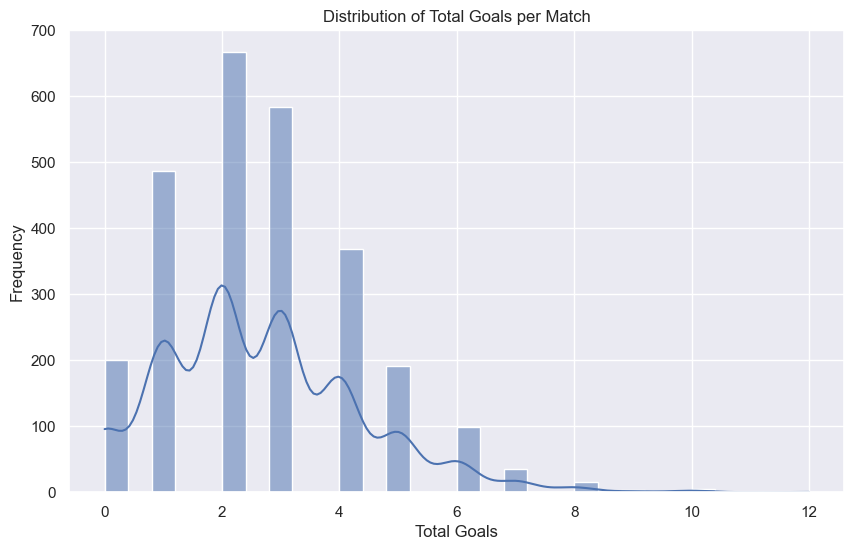

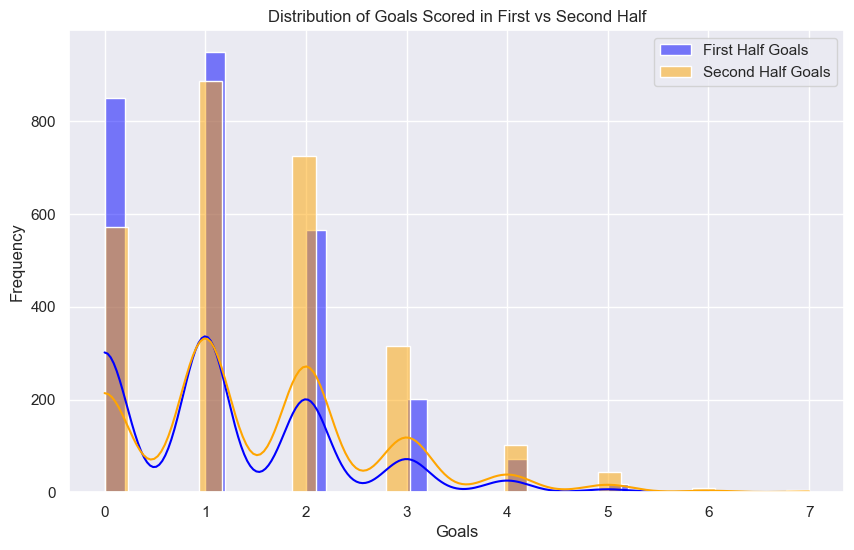

C:\Users\dasha\AppData\Local\Temp\ipykernel_3476\2120723556.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result_labels, y=result_counts, palette='viridis')


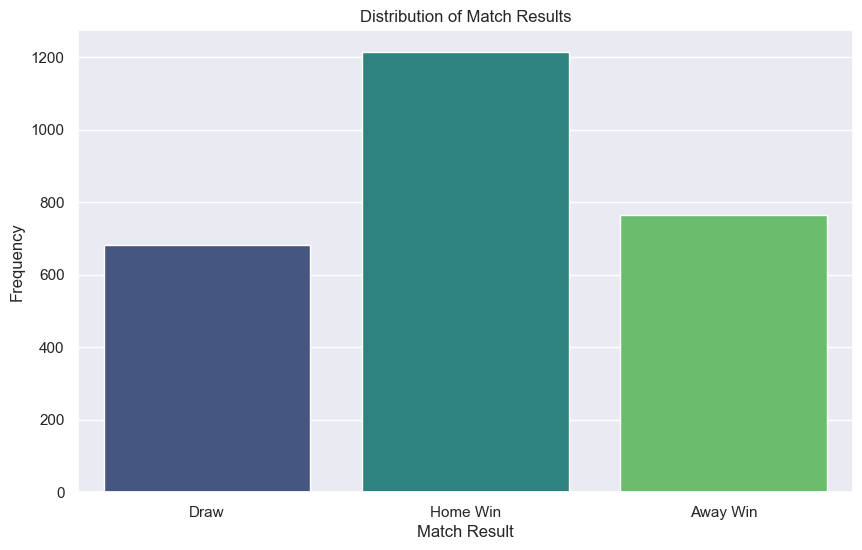

result
0     682
1    1214
2     764
Name: count, dtype: int64

In [24]:
# Scoring Patterns Analysis

data['Total Goals'] = data['Home Team Goals Scored'] + data['Away Team Goals Scored']
plt.figure(figsize=(10, 6))
sns.histplot(data['Total Goals'], kde=True, bins=30)
plt.title('Distribution of Total Goals per Match')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()

data['First Half Goals'] = data['Home Team Half Time Goals'] + data['Away Team Half Time Goals']
data['Second Half Goals'] = data['Total Goals'] - data['First Half Goals']

plt.figure(figsize=(10, 6))
sns.histplot(data['First Half Goals'], kde=True, bins=30, color='blue', label='First Half Goals')
sns.histplot(data['Second Half Goals'], kde=True, bins=30, color='orange', label='Second Half Goals')
plt.title('Distribution of Goals Scored in First vs Second Half')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

result_counts = data['result'].value_counts().sort_index()
result_labels = ['Draw', 'Home Win', 'Away Win']

plt.figure(figsize=(10, 6))
sns.barplot(x=result_labels, y=result_counts, palette='viridis')
plt.title('Distribution of Match Results')
plt.xlabel('Match Result')
plt.ylabel('Frequency')
plt.show()

result_counts

# Time Series Analysis
- how the stats evolved from 2014 to 2020

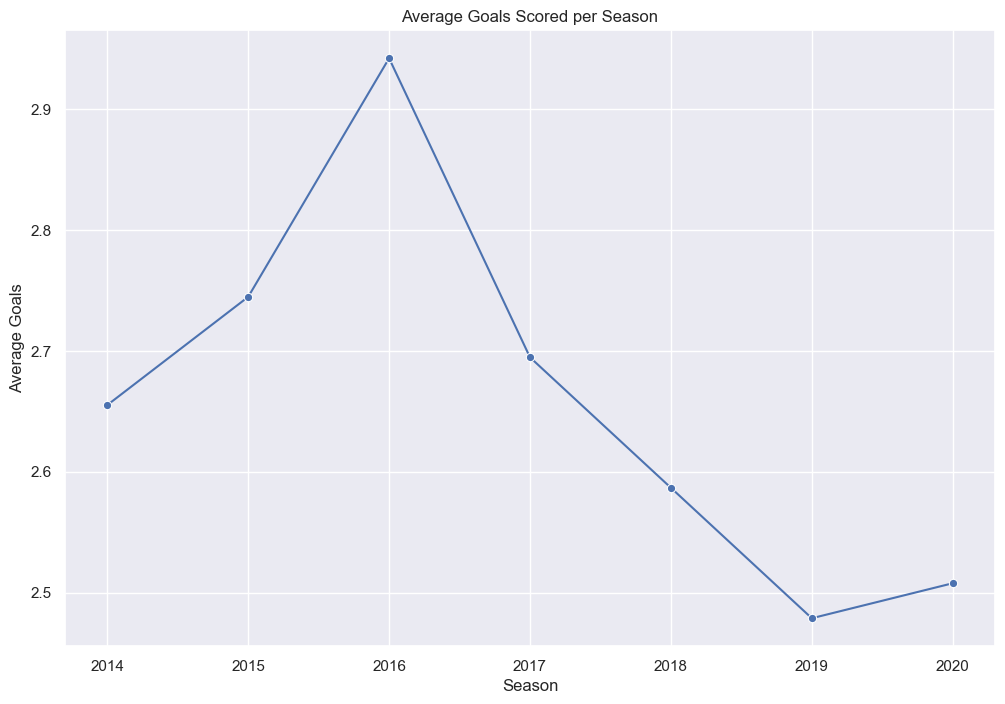

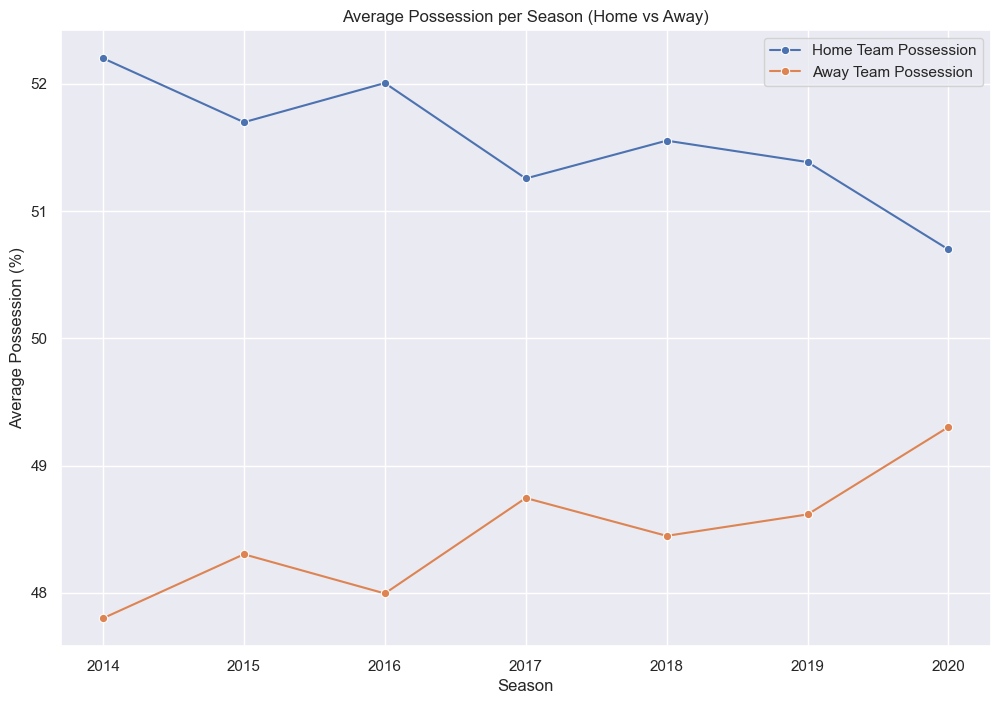

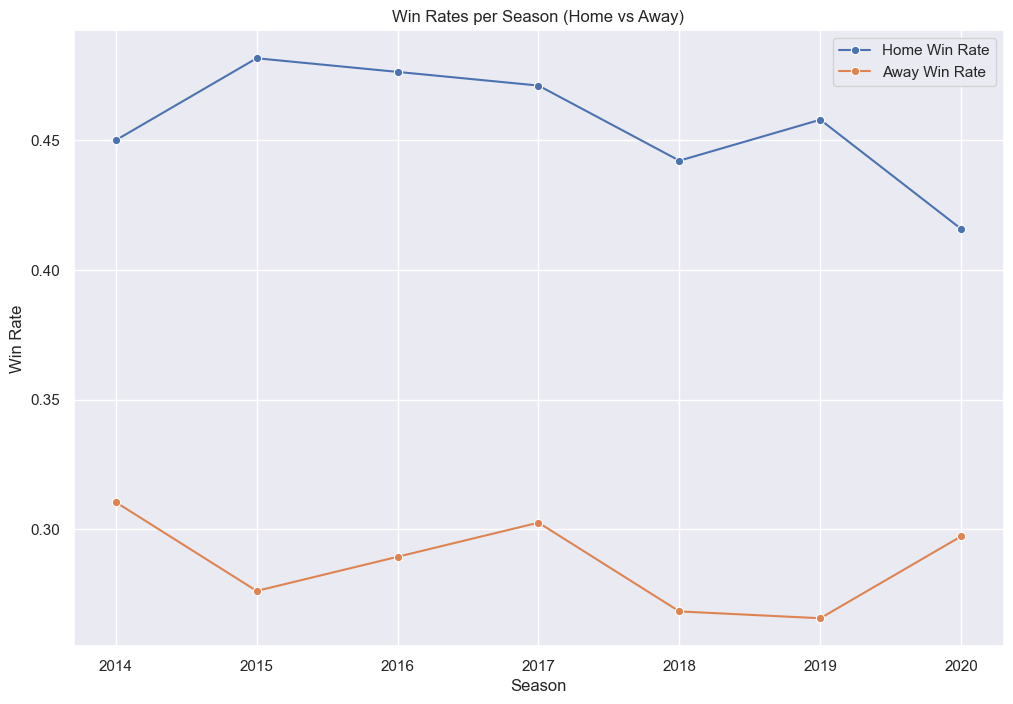

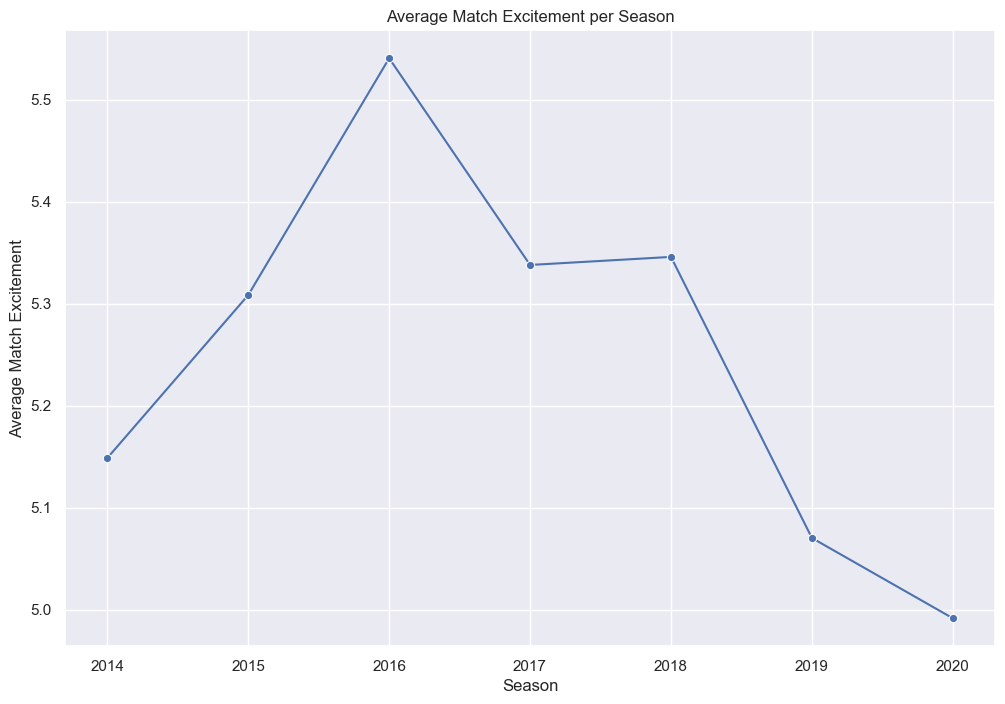

In [25]:

avg_goals_per_season = data.groupby('year')['Total Goals'].mean().reset_index()
avg_goals_per_season.columns = ['Season', 'Average Goals']

plt.figure(figsize=(12, 8))
sns.lineplot(x='Season', y='Average Goals', data=avg_goals_per_season, marker='o')
plt.title('Average Goals Scored per Season')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.show()

avg_possession_per_season = data.groupby('year')[['Home Team Possession %', 'Away Team Possession %']].mean().reset_index()
avg_possession_per_season.columns = ['Season', 'Home Team Possession', 'Away Team Possession']

plt.figure(figsize=(12, 8))
sns.lineplot(x='Season', y='Home Team Possession', data=avg_possession_per_season, marker='o', label='Home Team Possession')
sns.lineplot(x='Season', y='Away Team Possession', data=avg_possession_per_season, marker='o', label='Away Team Possession')
plt.title('Average Possession per Season (Home vs Away)')
plt.xlabel('Season')
plt.ylabel('Average Possession (%)')
plt.legend()
plt.show()

home_win_rate_per_season = data[data['result'] == 1].groupby('year').size() / data.groupby('year').size()
away_win_rate_per_season = data[data['result'] == 2].groupby('year').size() / data.groupby('year').size()

win_rate_per_season = pd.DataFrame({
    'Season': home_win_rate_per_season.index,
    'Home Win Rate': home_win_rate_per_season.values,
    'Away Win Rate': away_win_rate_per_season.values
})

plt.figure(figsize=(12, 8))
sns.lineplot(x='Season', y='Home Win Rate', data=win_rate_per_season, marker='o', label='Home Win Rate')
sns.lineplot(x='Season', y='Away Win Rate', data=win_rate_per_season, marker='o', label='Away Win Rate')
plt.title('Win Rates per Season (Home vs Away)')
plt.xlabel('Season')
plt.ylabel('Win Rate')
plt.legend()
plt.show()

avg_excitement_per_season = data.groupby('year')['Match Excitement'].mean().reset_index()
avg_excitement_per_season.columns = ['Season', 'Average Match Excitement']

plt.figure(figsize=(12, 8))
sns.lineplot(x='Season', y='Average Match Excitement', data=avg_excitement_per_season, marker='o')
plt.title('Average Match Excitement per Season')
plt.xlabel('Season')
plt.ylabel('Average Match Excitement')
plt.show()

Key Insights:
1. Home advantage is a significant factor in La Liga
2. Shot accuracy is more important than possession for scoring
3. Top teams maintain more consistent performance home/away
4. Scoring patterns favor second half goals
5. Match outcomes are relatively predictable based on key metrics